# Twitter US Airline Sentiment
_Introduction to Natural Language Processing_

__Joseph Reves joe.reves@gmail.com__

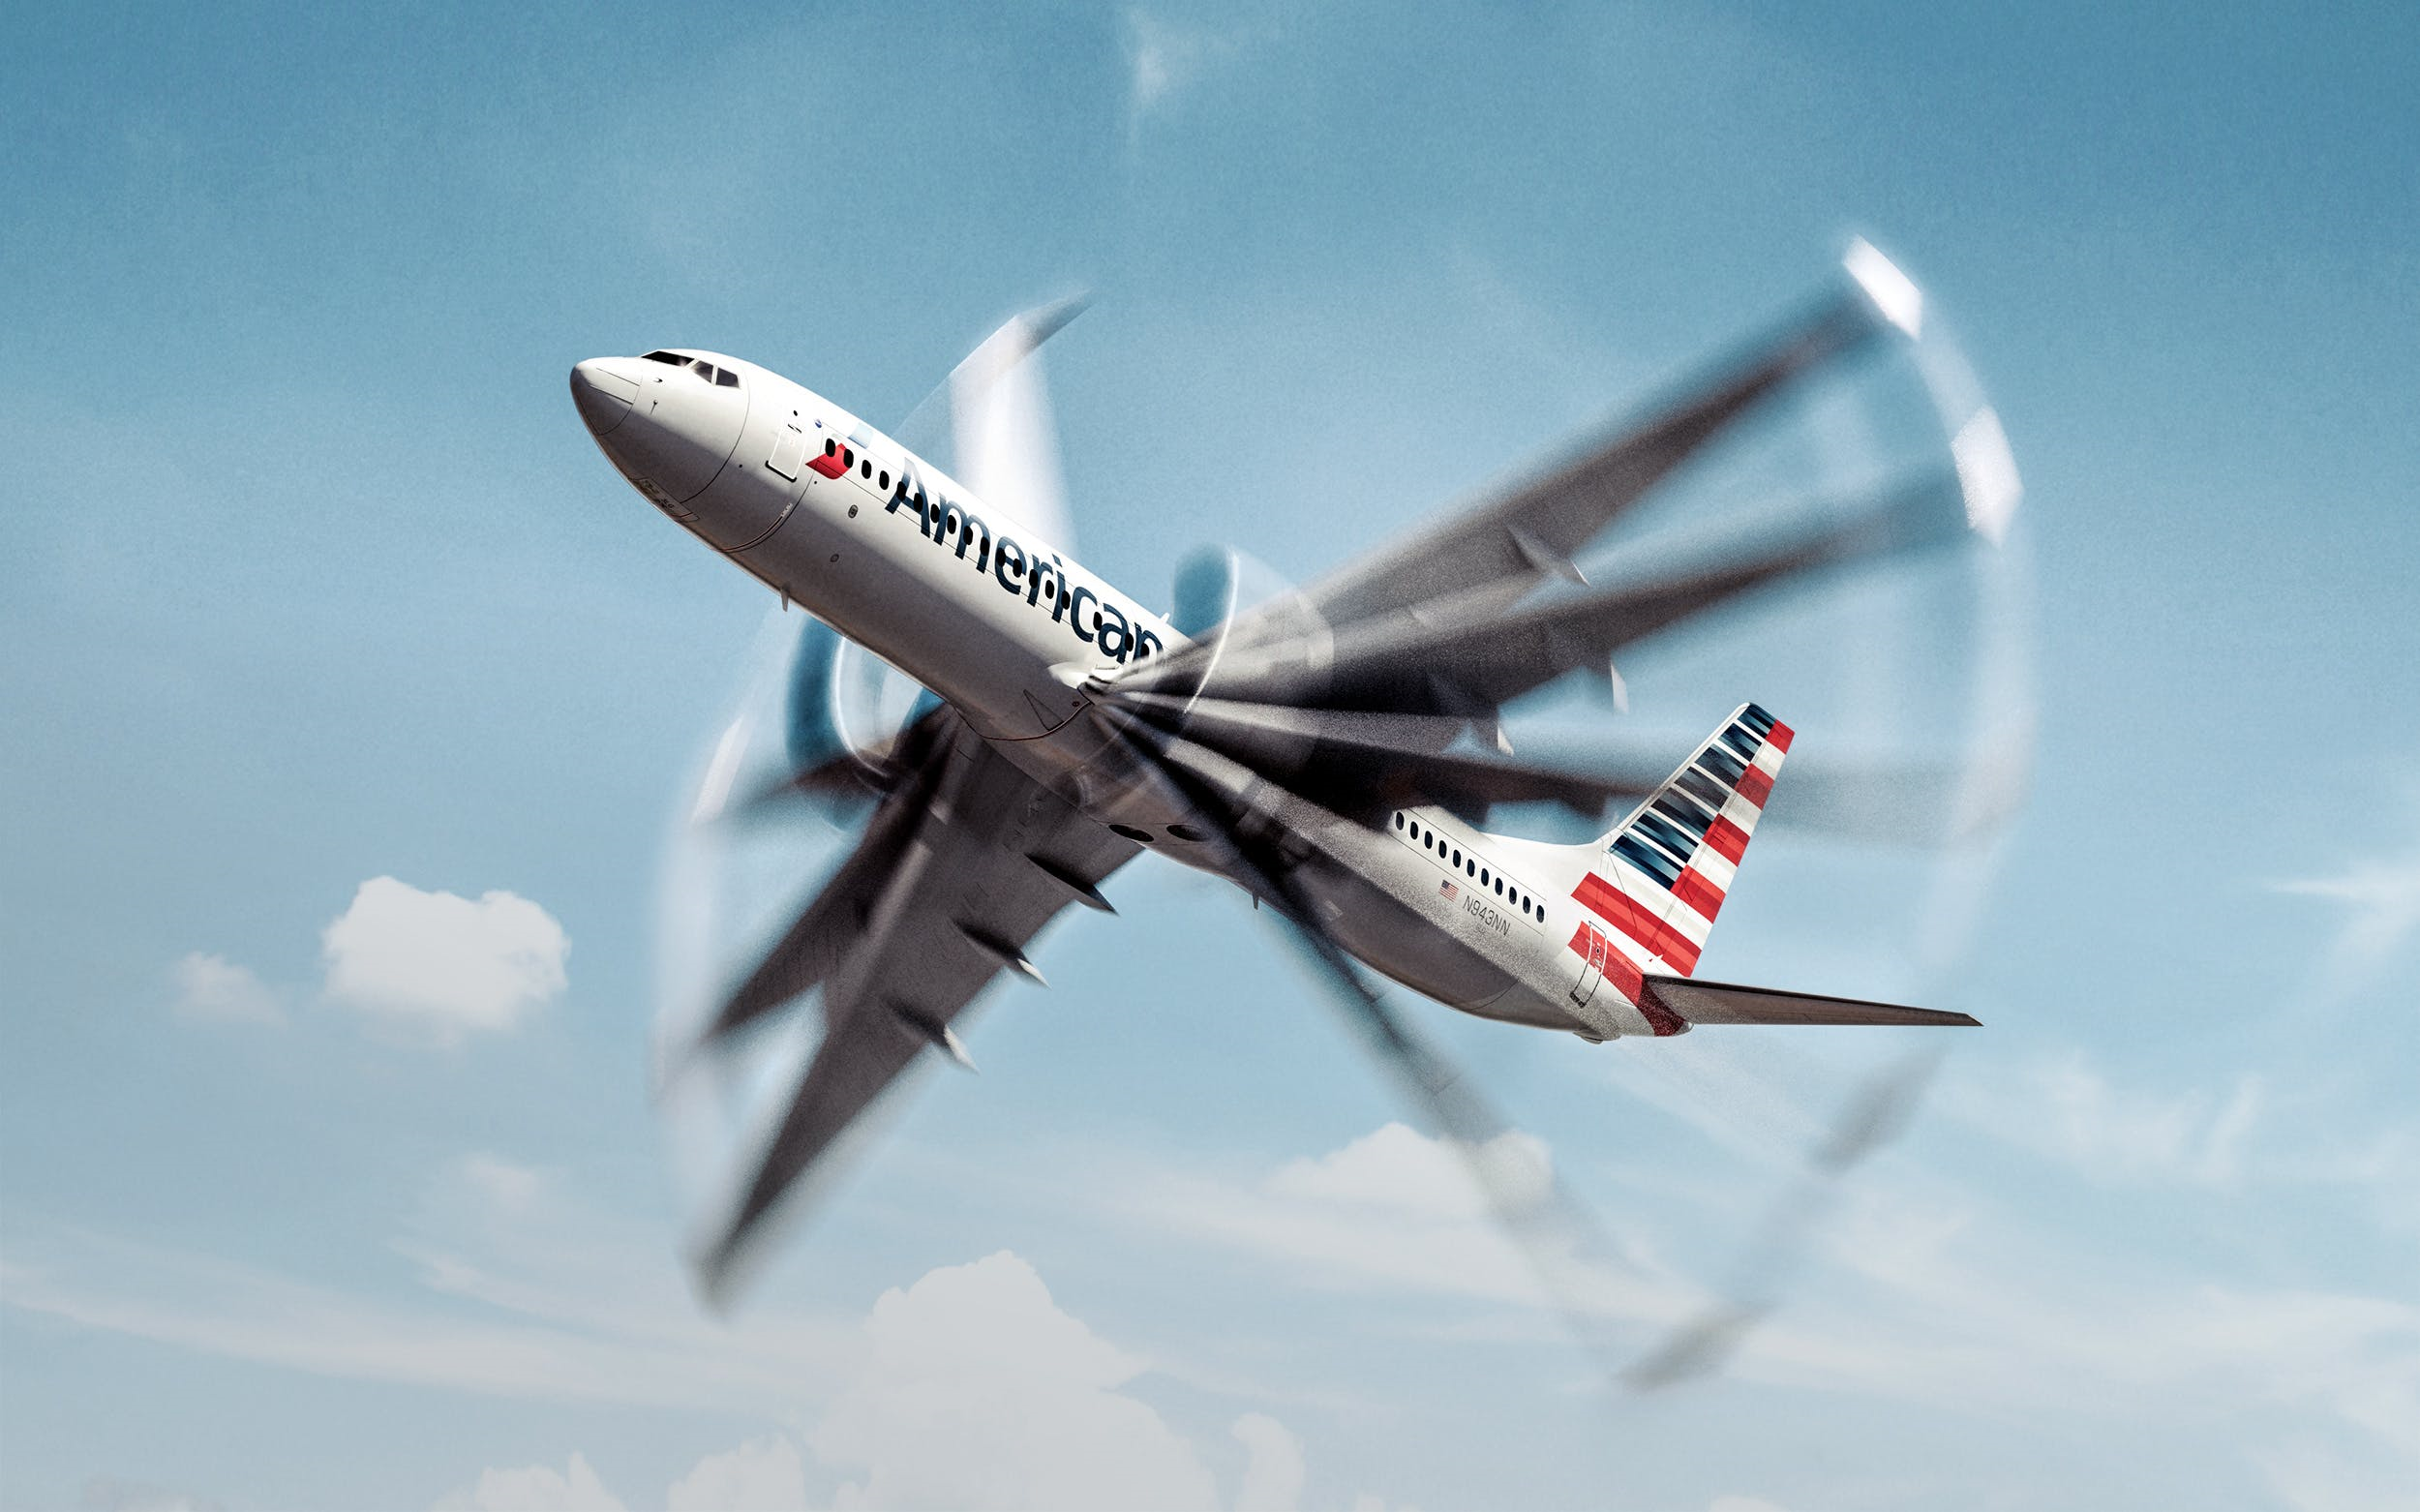

## Context and Objectives

Twitter's massive user base of 330 million monthly active users presents a direct avenue for businesses to connect with a broad audience. However, the vast amount of information on the platform makes it challenging for brands to swiftly detect negative social mentions that may impact their reputation. To tackle this, sentiment analysis has become a crucial tool in social media marketing, enabling businesses to monitor emotions in conversations, understand customer sentiments, and gain insights to stay ahead in their industry.

Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

__Objective__

The aim of this project is to build a sentiment analysis machine learning model that classifies the sentiment of tweets into positive, neutral & negative.

__Key Questions__

* What are the percentage of tweets for each airline?
* What are the distribution of sentiments across all the tweets?
* What are the distribution of sentiments for each airline?
* What does the plot of negative reasons indicate?
* How does a wordcloud appear for negative tweets?
* How does a wordcloud appear for positive tweets?
* What are insights observed from EDA?

__Data Description__

Data collected from a sentiment analysis project about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

* tweet_id - A unique identifier for each tweet                                                          
* airline_sentiment - The sentiment label of the tweet, such as positive, negative, or neutral                             
* airline_sentiment_confidence - The confidence level associated with the sentiment label                               
* negativereason - A category indicating the reason for negative sentiment                                                 
* negativereason_confidence - The confidence level associated with the negative reason                                    
* airline - The airline associated with the tweet                                                                   
* airline_sentiment_gold - Gold standard sentiment label                                               
* name - The username of the tweet author
* negativereason_gold - No description provided
* retweet_count - The number of times the tweet has been retweeted
* text - The actual text content of the tweet.
* tweet_coord - Coordinates of the tweet
* tweet_created - The timestamp when the tweet was created
* tweet_location - The location mentioned in the tweet
* user_timezone - The timezone of the tweet author
 
The data file name is:

* Tweets.csv

## Assignment Objectives

__Exploratory Data Analysis__
* Define the problem statement
* Read the dataset and print the overview of the data (statistical summary, shape, info, missing values, etc)
* Plot the distribution of all tweets among each airline
    * Plot the distribution of sentiment of tweets for each airline
* Plot the distribution of sentiment across all the tweets
    * Plot the distribution of all the negative reasons
* Plot the word cloud graph of tweets for positive and negative sentiment separately.

__Data Pre-processing__
* Pre-process the text data for classification 
    * Html tag removal
    * Tokenization
    * Remove the numbers
    * Removal of Special Characters and Punctuations
    * Removal of stopwords
    * Conversion to lowercase
    * Lemmatize or stemming
    * Join the words in the list to convert them back to text string in the data frame
* Print the first 5 rows of data after pre-processing
    * *Note: Subset the data with the actual text column and the sentiment of the airline.

__Text Vectorization__
* Use CountVectorizer
* Use TfidfVectorizer
* Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model

__Model building and Evaluation__
* Fit the model using vectorized column
* Cross-validate the model performance
* Evaluate the model using confusion matrix, and comment
* Print the top 40 features and plot their word cloud using both types of vectorization.

__Summarize Result & Recommendations__
* Summary results from the understanding of the application of 
    * Pre-processing
    * Vectorization
    * Performance of the model on the dataset.

__Notebook - Overall quality__
* Structure and flow
 * Crispness
 * Visual appeal 
 * Well commented code
* Conclusion and business recommendations

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

pd.set_option("max_colwidth", None)

# useful utilities
import random
import seaborn as sns
import math
from tabulate import tabulate

# text processing
import string
import re, string, unicodedata
import contractions
from bs4 import BeautifulSoup

# NTLK Library
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Helps to display the images
from PIL import Image

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# sklearn utilities
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Helps to pad the sequences into the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Used to create the tokens from the text data
from tensorflow.keras.preprocessing.text import Tokenizer

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Used to create the Sequential model
from keras.models import Sequential

# Layers that are used to implement the LSTM model
from tensorflow.keras.layers import (
    Dense,
    Embedding,
    Bidirectional,
    LSTM,
    SpatialDropout1D,
)
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2

# Tensorflow
import tensorflow as tf
from tensorflow.keras import backend

tf.get_logger().setLevel("ERROR")

# Libraries for keras model visualization
import visualkeras
from PIL import ImageFont
from keras_visualizer import visualizer

# Supress Warnings
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow")

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
# Optionally download library data content as necessary
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joere\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joere\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\joere\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<IPython.core.display.Javascript object>

In [3]:
# Version, and GPU availability
print("TensorFlow version:", tf.__version__)
print("Number of GPUs Available: ", len(tf.config.list_physical_devices("GPU")))

TensorFlow version: 2.10.0
Number of GPUs Available:  1


<IPython.core.display.Javascript object>

<div class="alert alert-block alert-info">
<b>Dependency:</b> For this project, I'm using Anaconda on my local machine with GPU processing on my AMD GPU enabled. 
I've installed Microsoft's DirectML-Plugin to enable the backend for TensorFlow.
</div>

## Loading the dataset

<div class="alert alert-block alert-info">
<b>Dependency:</b> Loading the "Tweets.csv" dataset from the local directory where the notebook is stored.
</div>

In [4]:
# Mount Google drive to access the dataset
# Run the below code if you using google colab
# from google.colab import drive
# drive.mount('/content/drive')

<IPython.core.display.Javascript object>

In [5]:
# Load the Tweets data.  These are stored as a csv file on disk
tweets = pd.read_csv("Tweets.csv")
orig_twits = tweets.copy()

<IPython.core.display.Javascript object>

## Data Overview

### Shape of the data

In [6]:
# Quick look at a random sample of values in the data
tweets.sample(5)

tweet_id airline_sentiment  airline_sentiment_confidence  \
8854   567798973008994304          positive                        1.0000   
1739   569608870429114368          negative                        1.0000   
11218  568411114448523264          negative                        1.0000   
7311   569672510565969920          positive                        0.6700   
9967   569598852912668672           neutral                        0.6699   

               negativereason  negativereason_confidence     airline  \
8854                      NaN                        NaN       Delta   
1739   Customer Service Issue                     0.3407      United   
11218             Late Flight                     0.3483  US Airways   
7311                      NaN                        NaN       Delta   
9967                      NaN                     0.0000  US Airways   

      airline_sentiment_gold             name negativereason_gold  \
8854                     NaN         gigiri27                 NaN   
1739                     NaN       windycityf                 NaN   
11218                    NaN  HirasmusBidragi                 NaN   
7311                     NaN         nooshies                 NaN   
9967                     NaN         hlauinfo                 NaN   

       retweet_count  \
8854               0   
1739               0   
11218              0   
7311               0   
9967               0   

                                                                                                                                         text  \
8854                                             @JetBlue love traveling with Jetblue. Cant wait to go to Paris oui oui!!! NYC was awesomeee!   
1739                                                                        @united stuck in YYZ because staff took a break? Not happy 1K....   
11218                           @USAirways @HirasmusBidragi will try.. Now stuck on tarmac waiting on gate. :( may miss 9:25 connection #883)   
7311   @JetBlue @ABCNetwork please give JetBlue all the permissions in the world! I'm missing the oscars right now, and it's awful #whyabcwhy   
9967                                                                 @USAirways you should update your passbook passes with any gate changes.   

      tweet_coord              tweet_created tweet_location  \
8854          NaN  2015-02-17 13:33:19 -0800            NaN   
1739          NaN  2015-02-22 13:25:12 -0800  Oak Park, IL    
11218         NaN  2015-02-19 06:05:44 -0800   Scruffyville   
7311          NaN  2015-02-22 17:38:05 -0800     Boston, MA   
9967          NaN  2015-02-22 12:45:23 -0800    Los Angeles   

                    user_timezone  
8854                          NaN  
1739                       Hawaii  
11218                         NaN  
7311   Eastern Time (US & Canada)  
9967   Pacific Time (US & Canada)

<IPython.core.display.Javascript object>

In [7]:
# What's the size and shape of the data?
print(
    "The available data includes",
    tweets.shape[0],
    "rows, with",
    tweets.shape[1],
    "columns of information",
)

The available data includes 14640 rows, with 15 columns of information


<IPython.core.display.Javascript object>

In [8]:
# get a list of all our columns
columns = tweets.columns
print(columns)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


<IPython.core.display.Javascript object>

In [9]:
# How is the data currently typed by python?
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

<IPython.core.display.Javascript object>

__There are a number of columns we won't need for our model; we'll drop those after exploratory data analysis.__

In [10]:
# summarize null values in the data
tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

<IPython.core.display.Javascript object>

In [11]:
# describe the object colums
tweets.describe(include="object").T

count unique                         top  freq
airline_sentiment       14640      3                    negative  9178
negativereason           9178     10      Customer Service Issue  2910
airline                 14640      6                      United  3822
airline_sentiment_gold     40      3                    negative    32
name                    14640   7701                 JetBlueNews    63
negativereason_gold        32     13      Customer Service Issue    12
text                    14640  14427              @united thanks     6
tweet_coord              1019    832                  [0.0, 0.0]   164
tweet_created           14640  14247   2015-02-24 09:54:34 -0800     5
tweet_location           9907   3081                  Boston, MA   157
user_timezone            9820     85  Eastern Time (US & Canada)  3744

<IPython.core.display.Javascript object>

In [12]:
# Let's look at unique values / counts for our object columns
for i in tweets.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(tweets[i].value_counts())
    print("*" * 50)

Unique values in airline_sentiment are :
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64
**************************************************
Unique values in negativereason are :
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64
**************************************************
Unique values in airline are :
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64
**************************************************
Unique values in airline_sentiment_gold are :
negative    32
positive     5
neutral    

<IPython.core.display.Javascript object>

#### Observations:

* __Describing the numeric columns won't add any value here__
* __Looking at the unique values for object columns, a few quick observations:__
    * __Six airlines are represented in the data__
    * __The majority of the sentiments classified are negative, with the most often cited reason "Customer Service Issue"__
    * __I'm guessing the "gold" sentiments / reasons are customers in the loyalty programs__
    * __A number of sources of tweets are from the same authors__
    * __Positive texts are short, less detailed - "thanks!", but negative texts are longer and more detailed__
* __We've got seven columns with missing data altogether, but most of those are not useful for our analysis__
* __We have both negativereason and negativereason_gold columns we can use in our EDA__
* __Much of the twitter instrumentation isn't useful for us in the context, and can be dropped__
* __Our key columns will be the sentiment columns, and the text itself__

## Exploratory Data Analysis

#### Useful Functions

In [13]:
# function to create labeled barplots
def labeled_barplot(data, feature, hue=None, perc=False, n=None, width=12, height=6):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    hue: whether to groupby another dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column

    # Set the figure size
    plt.figure(figsize=(width, height))
    plt.xticks(rotation=30)

    ax = sns.countplot(
        data=data,
        x=feature,
        hue=hue,
        palette="Blues",
        order=data[feature].value_counts().index,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [14]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    # print(tab1)
    # print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=30)
    plt.show()

<IPython.core.display.Javascript object>

In [15]:
# function to clean up text and generate a wordcloud
def wordcloud(tweets, background="white"):
    airlines = (
        "virginamerica",
        "jetblue",
        "delta",
        "southwest",
        "southwestair",
        "united",
        "usairways",
        "americanair",
        "aa",
    )
    words = " ".join(tweets["text"])

    # Remove punctuation
    translator = str.maketrans("", "", string.punctuation)
    words = words.translate(translator)

    cleaned_word = " ".join(
        [
            word
            for word in words.split()
            if "http" not in word  # filter out URLs
            and not word.startswith("@")  # filter out twitter handles
            and word.lower() not in airlines  # filter out any remaining airline names
            and word != "RT"  # filter out the common abbreviation for "round-trip"
        ]
    )
    wordcloud = WordCloud(
        stopwords=STOPWORDS, width=3000, height=2500, background_color=background
    ).generate(cleaned_word)

    plt.figure(1, figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>

#### Airlines

In [16]:
# Quick look at the distribution of airlines represented in our dataset
tweet_counts = tweets["airline"].value_counts()
print(tweet_counts)

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

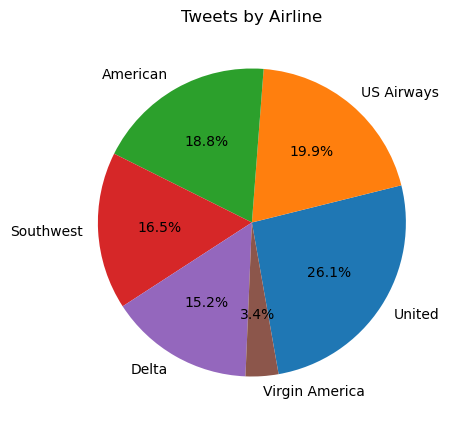

<IPython.core.display.Javascript object>

In [17]:
# Tweets by airline
plt.figure(figsize=(5, 5))
plt.pie(tweet_counts, labels=tweet_counts.index, autopct="%1.1f%%", startangle=280)
plt.title("Tweets by Airline")

# plot the chart
plt.show

* __Six airlines altogether; our tweets are roughly balanced, with the exception of a slight over-representation of United, and a substantial underrepresentation of Virgin America.__

#### Timing

In [18]:
# convert tweet_created column into a datetime
tweets["tweet_created"] = pd.to_datetime(tweets["tweet_created"])
tweets["tweet_created"] = tweets["tweet_created"].astype("datetime64[ns]")
tweets.describe(include=["datetime"]).T

count unique                 top freq               first  \
tweet_created  14640  14247 2015-02-24 17:54:34    5 2015-02-17 07:36:05   

                             last  
tweet_created 2015-02-24 19:53:37

<IPython.core.display.Javascript object>

* __This gives us our time range from February 17th through the 24th of 2015__

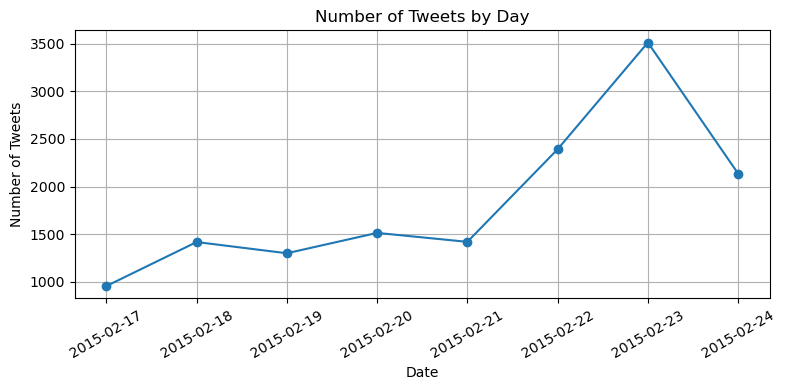

<IPython.core.display.Javascript object>

In [19]:
# show number of tweets by day
by_day = tweets.groupby(pd.Grouper(key="tweet_created", axis=0, freq="D")).count()[
    "tweet_id"
]

# line chart by day
plt.figure(figsize=(8, 4))
plt.plot(by_day.index, by_day.values, marker="o", linestyle="-")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets by Day")
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()

# Show the chart
plt.show()

* __We may have had some significant external event on the 23rd that caused a spike in tweets__

#### Tweet Sentiments

We've got both sentiment and sentiment_gold and the corresponding negative reasons - what's up with that? Do these just overlap completely, with extra columns for "gold" something?  Let's check:

In [20]:
nongold = tweets["airline_sentiment"]
gold = tweets["airline_sentiment_gold"]
mismatched_sentiments = tweets[(gold.notnull()) & (nongold != gold)]
print(mismatched_sentiments[["airline_sentiment", "airline_sentiment_gold"]])

Empty DataFrame
Columns: [airline_sentiment, airline_sentiment_gold]
Index: []


<IPython.core.display.Javascript object>

There are no rows where - if there's a value in the "gold" sentiment column - it's different that what's in the reglar sentiment column.  Just for thoroughness, let's check the negative reasons as well:

In [21]:
nongold = tweets["negativereason"]
gold = tweets["negativereason_gold"]
mismatched_reasons = tweets[(gold.notnull()) & (nongold != gold)]
print(mismatched_reasons[["negativereason", "negativereason_gold"]])

               negativereason                       negativereason_gold
1286              Late Flight  Late Flight\nFlight Attendant Complaints
2017              Late Flight                 Late Flight\nLost Luggage
3149   Customer Service Issue  Cancelled Flight\nCustomer Service Issue
6530   Customer Service Issue  Cancelled Flight\nCustomer Service Issue
8536             Lost Luggage             Lost Luggage\nDamaged Luggage
12025        Cancelled Flight             Late Flight\nCancelled Flight
12034            Lost Luggage      Customer Service Issue\nLost Luggage
12038               longlines                    Customer Service Issue
12039              Can't Tell        Customer Service Issue\nCan't Tell


<IPython.core.display.Javascript object>

Ok - so the key difference here appears to be in the option for "gold" customers to select multiple reasons for a negative sentiment. With the exception of the "longlines" row, all the other negative reasons incorporate at least one of the "gold" negative reasons. On that basis, I'll consider the "negativereason" column as authoritative, and ignore the "negativereason_gold" column. The sentiment results are identical.

It's not clear if the "gold" suffix denotes a "gold" or otherwise premium airline customer, or - since this is Twitter data - a "gold" or otherwise premium Twitter customer. In any case, there's insufficient business context to evaluate it.

__Next, let's look at the simple distribution of the tweet sentiments across the entire data.__

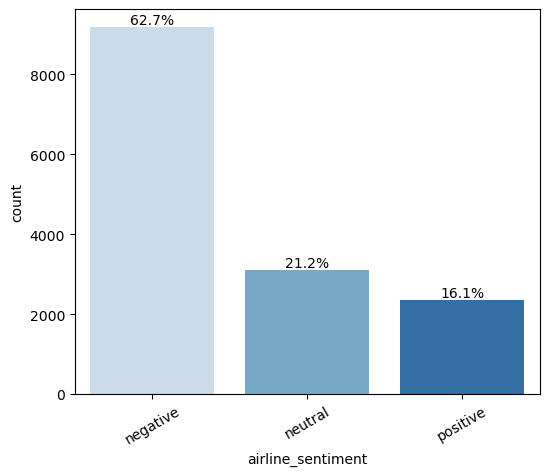

<IPython.core.display.Javascript object>

In [22]:
# distribution of tweet sentiments
labeled_barplot(tweets, "airline_sentiment", perc=True, width=6, height=5)

* __This is clearly unbalanced, with a strong bias towards negative sentiments.__
* __The conclusion you can draw here is that mostly customers who are dissatisfied take to twitter to voice their unhapiness.__
* __This specifically doesn't indicate a breakdown of happy/unhappy customers__
    * __Just the sentiments of the vocal passengers that choose to express themselves on twitter__

__Let's examine a breakdown of sentiments in detail, by airline:__

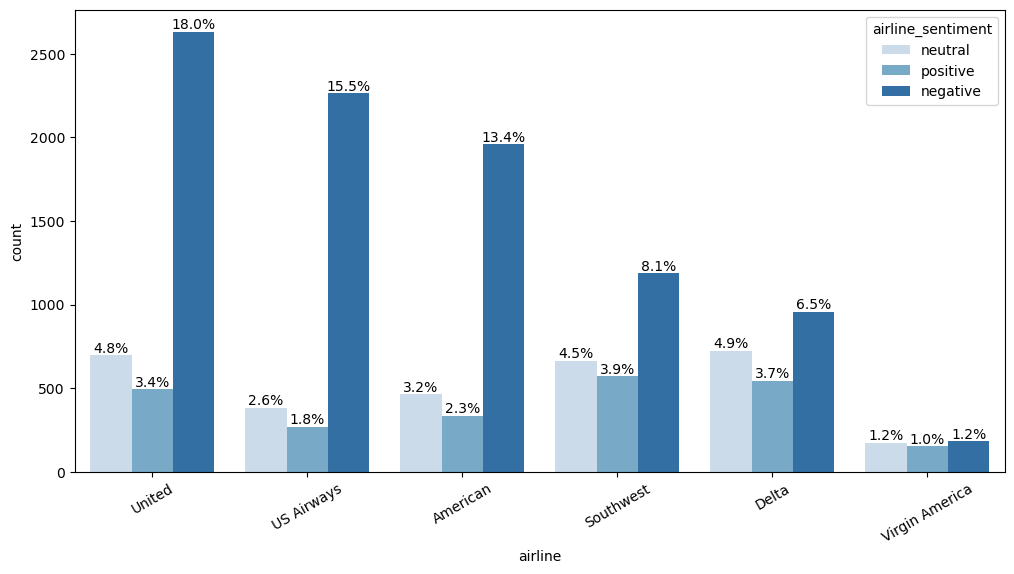

<IPython.core.display.Javascript object>

In [23]:
# distribution of sentiments across all airlines
labeled_barplot(tweets, "airline", "airline_sentiment", perc=True)

* __United passengers - by far - are the most decisively negative about their experience with the airline__
* __Delta and Virgin America have more balanced comments in twitter across the range of satisfaction__
* __US Airways customers have the largest spread of satisfaction levels in their twitter comments__
* __Delta customers seem to have the largest number of positive experiences reported in twitter__

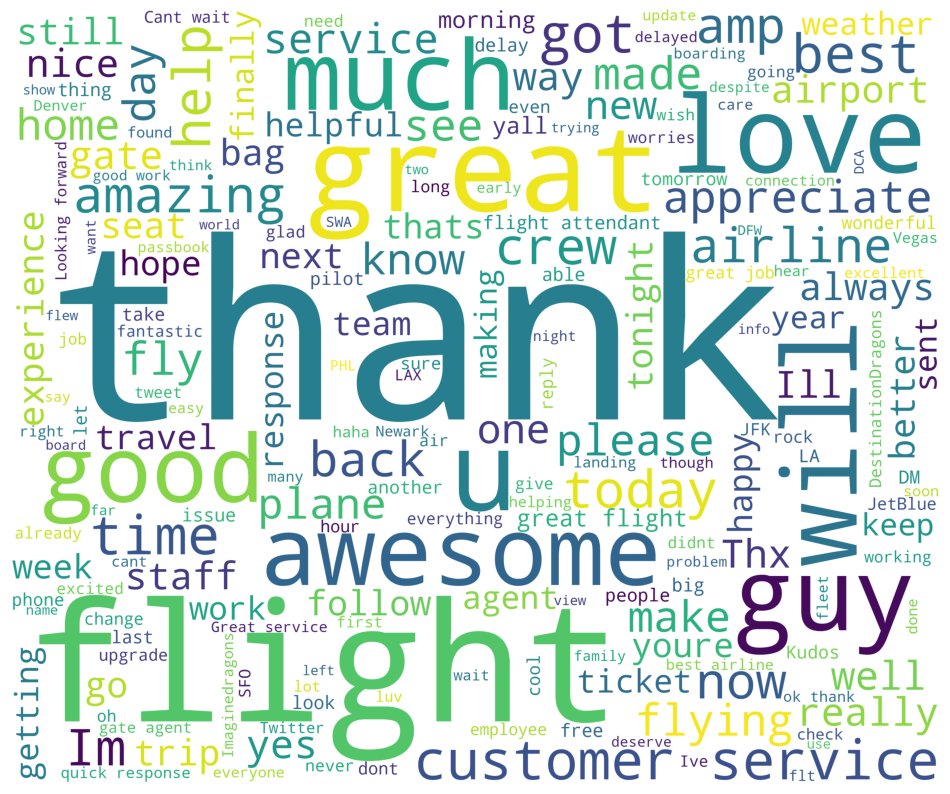

<IPython.core.display.Javascript object>

In [24]:
# Let's look at a wordcloud of positive sentiment tweets
positive_tweets = tweets[tweets["airline_sentiment"] == "positive"]
wordcloud(positive_tweets)

__Clearly positive sentiments expressed in the terms used for these tweets__

#### Dissatisfaction

We've seen that the overwhelming majority of our tweet data contains negative sentiments, and our data provides a limited set of reason categories for passenger dissatisfaction.

__Let's examine the reasons for passengers negative sentiment in their tweets:__

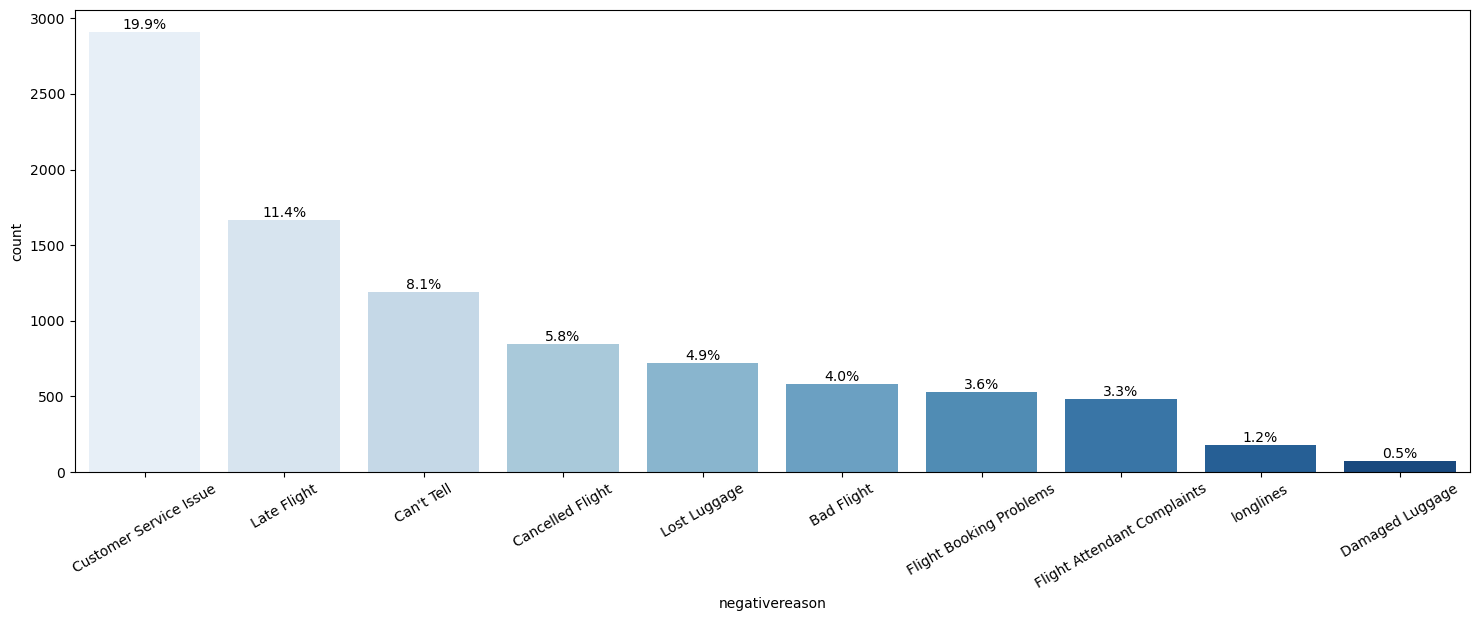

<IPython.core.display.Javascript object>

In [25]:
# Let's plot out percentages of reasons for negative sentiment across all the data
labeled_barplot(tweets, "negativereason", perc=True, width=18)

* __About one fith of all our negative tweets mention customer service issues__
    * __This suggests that these customer have already interacted with customer service, and are complaining about it__
* __Late or cancelled flights together make up the second largest group of complaints__
* __Lost or damaged luggage is about 5% of what customers tweet about__
* __Grouping bad flights and flight attendant complaints gives us about seven and half percent of tweets__
* __"Can't tell" is a negative experience where the customer is not clear about the reason__
    * __These are good candidates to follow up on personally with the passenger__
    

__Let's examine a breakdown reasons for dissatisfaction in detail, by airline:__

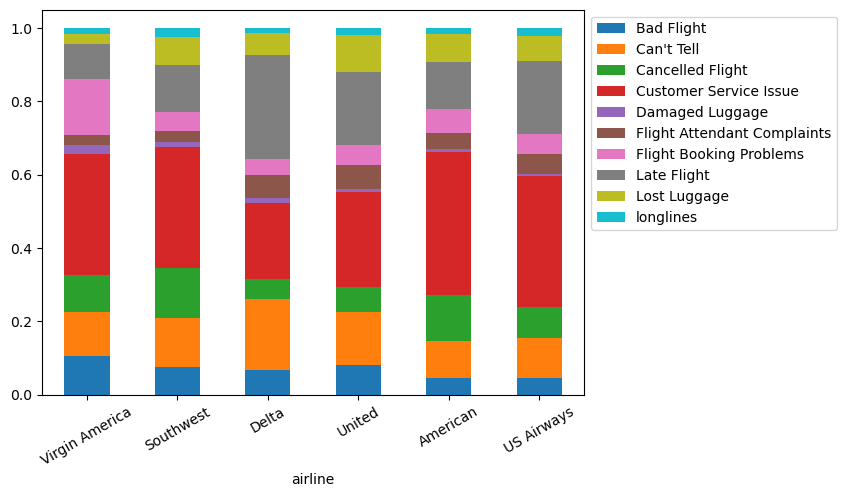

<IPython.core.display.Javascript object>

In [26]:
# Let's compare reasons for dissatisfaction by airline
stacked_barplot(tweets, "airline", "negativereason")

* __We see some interesting differences in the tweets that express dissatisfaction between different airlines__
* __We see customer service issues as the largest proportion of issues reported for most airlines__
    * __Of the sentiments appearing in tweets for American, customer service seems to a larger issue than any other airline__
* __Delta customers are most vocal on twitter about late flights__
* __Virgin America seems to have issues with booking flights__
* __Cancelled flights are a substantial complaint from both Southwest and American passengers__
* __Delta passengers seem to have a significant number of dissatisfying experiences with no clear reason__
* __Virgin America and United both draw more complaints about long lines__

#### What happened during that spike in tweets?

In [27]:
# Let's extract that time period where the volume of tweets increased
start_time = pd.to_datetime("2015-02-21 00:00:00")
end_time = pd.to_datetime("2015-02-24 23:59:59")

# Extract the rows within the time range
spike_tweets = tweets[
    (tweets["tweet_created"] >= start_time) & (tweets["tweet_created"] <= end_time)
]

<IPython.core.display.Javascript object>

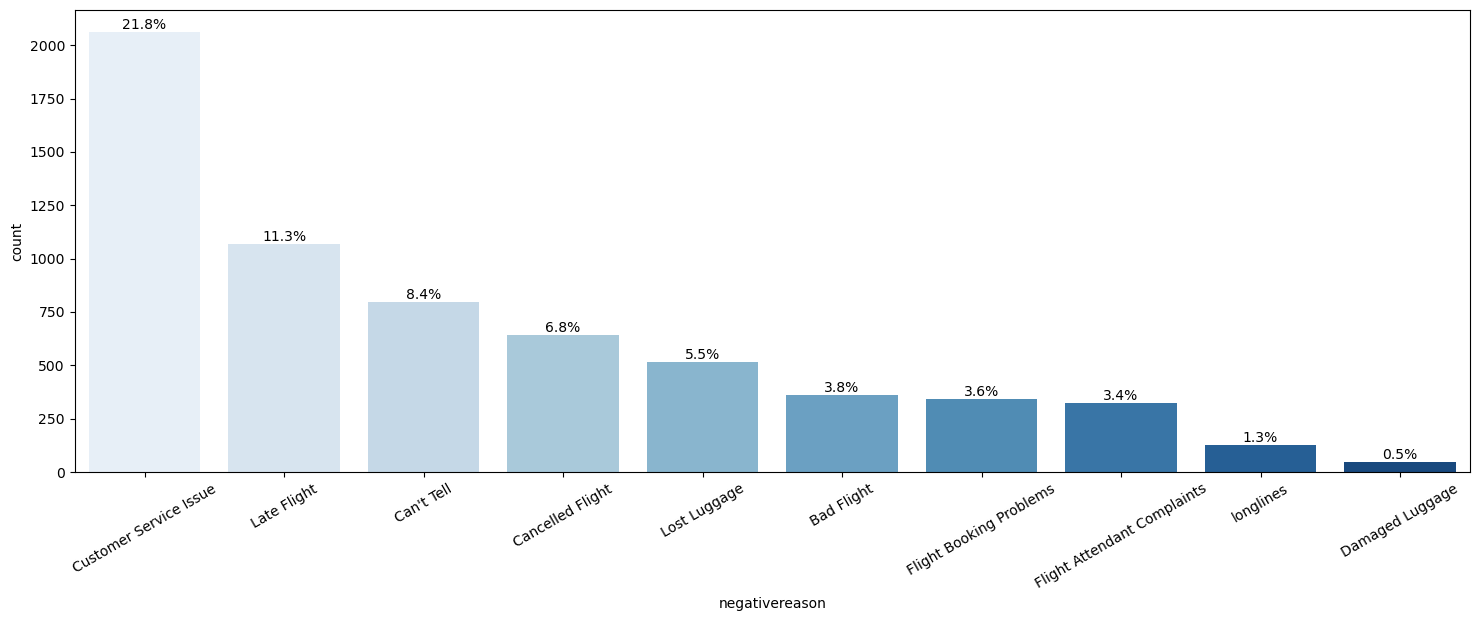

<IPython.core.display.Javascript object>

In [28]:
# Plot the negative sentiment reasons
labeled_barplot(spike_tweets, "negativereason", perc=True, width=18)

* __Slightly higher rate of tweets about cancelled flights and customer service issues, but nothing really stands out as extraordinary.__
    * __Still worth checking.__
    
__Finally, let's look at a wordcloud from tweets that are classified as negative:__

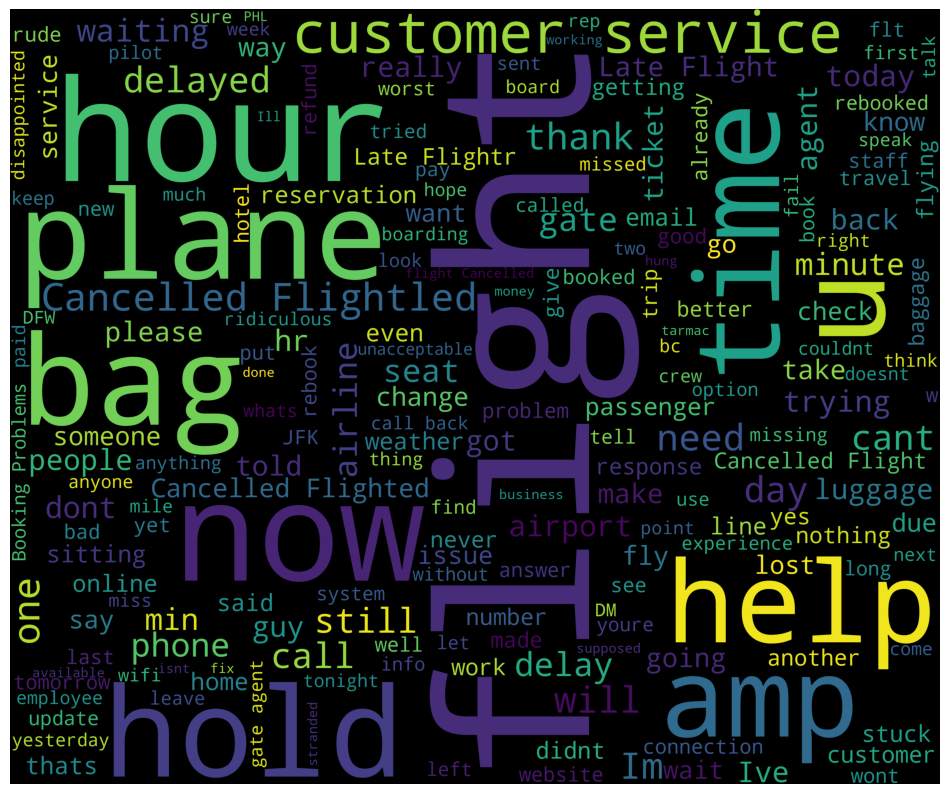

<IPython.core.display.Javascript object>

In [29]:
# Let's look at a wordcloud of negative sentiment tweets
negative_tweets = tweets[tweets["airline_sentiment"] == "negative"]
wordcloud(negative_tweets, background="black")

__Here we see lots of frustration, and negative terms expressed in these tweets__

Note we've excluded neutral tweets, refraining from grouping them with either positive or negative sentiments

## Data Preprocessing

Having completed the exploratory data analysis, we'll prepare the data we need to build the model for analysis. That will included dropping all the columns we don't need, and reformatting the text data to remove noise and extraneous characters from our tweets. 

These operations can all be combined and compactly executed - however, for this exercise I'll execute each operation on the data separately, and show the intermediate results. That also servers to clearly modularize and illustrate the technique for each operation to clean the data, and the effects it has.

#### Drop unecessary columns

In [30]:
# enumerate the features we need for our analysis
features = ["airline_sentiment", "text"]
drop_columns = [col for col in columns if col not in features]
print(drop_columns)

['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']


<IPython.core.display.Javascript object>

In [31]:
# drop the columns we won't need
tweets = tweets.drop(columns=drop_columns)

<IPython.core.display.Javascript object>

In [32]:
# confirm the data that's left
tweets.sample(5)

airline_sentiment  \
13850          negative   
5218            neutral   
12549          negative   
2957           negative   
4671            neutral   

                                                                                                                                              text  
13850  @AmericanAir and even worse, by the time you responded to my tweets I took two flights over five hours. And that was the quickest response!  
5218         @SouthwestAir hey southwest! Can I see @Imaginedragons in Atlanta? My friend has never been there, loves them, and he is from Taiwan!  
12549                     @AmericanAir yeah, buy me a @Delta plane ticket from San Diego to Detroit so I can fly one of their planes home tomorrow  
2957                                            @united or I'm sure her business will go else where for airline travel. Her name is Kathryn Sotelo  
4671                                    @SouthwestAir could you please tell me if there is a way to add a RR# to a flight that already took place?

<IPython.core.display.Javascript object>

In [33]:
# Confirm the dataframe size and types
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


<IPython.core.display.Javascript object>

#### Remove HTML tags

In [34]:
# function to remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

<IPython.core.display.Javascript object>

In [35]:
# remove the url's present in the text
def remove_url(text):
    text = re.sub(
        "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+",
        "",
        text,
    )
    return text

<IPython.core.display.Javascript object>

In [36]:
# Apply the remove_html_tags and remove URL functions
tweets["text"] = tweets["text"].apply(remove_html_tags)
tweets["text"] = tweets["text"].apply(remove_url)

<IPython.core.display.Javascript object>

In [37]:
# sample the text column
tweets.sample(5)

airline_sentiment  \
7643            neutral   
9530           negative   
1246           positive   
7539            neutral   
10751           neutral   

                                                                                                                                              text  
7643                                      @Jetblue I'm so sorry I cheated on you with @Delta @DeltaAssist. Please take me back. I wore protection.  
9530                          @USAirways would have been nice to be offered in flight credit. Especially since I'm staring at empty overhead room.  
1246   @united Thanks for looking into this and for getting back to me via DM. Glad to hear my bag is finally being delivered to me. Thanks again!  
7539                                                                                              @JetBlue when will the system be up and running?  
10751   @USAirways there is nothing tonight and I am on the flight now with GOGO internet is there a way that someone could send me a DM or email?

<IPython.core.display.Javascript object>

#### Remove contractions

In [38]:
# function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

<IPython.core.display.Javascript object>

In [39]:
# Apply the expand_contractions function
tweets["text"] = tweets["text"].apply(expand_contractions)

<IPython.core.display.Javascript object>

In [40]:
# sample the text column
tweets.sample(5)

airline_sentiment  \
14298          negative   
10559           neutral   
12602          negative   
11429          positive   
7196           negative   

                                                                                                                                               text  
14298      @AmericanAir you cxl both my flights to/from DFW to CLL w/o notice then treat me like trash on the phone and offer no compensation? WTH?  
10559                                                                                                @USAirways @shivadelrahim what about upgrades?  
12602    @AmericanAir your online site does not have flights listed in chronological order, resulting in a mis-purchase. Anything that can be done?  
11429                                                                      @USAirways she also appreciated having her very own hashtag! :) #lucycat  
7196   @JetBlue All correct for rates Boston to Pittsburgh wknd March 14? Rates all of a sudden took off! Made plans, came back to buy & surprised.

<IPython.core.display.Javascript object>

#### Remove numeric values

In [41]:
# Function to remove numeric values
def remove_numeric(text):
    return re.sub(r"\d+", "", text)

<IPython.core.display.Javascript object>

In [42]:
# Apply the remove_numeric function
tweets["text"] = tweets["text"].apply(remove_numeric)

<IPython.core.display.Javascript object>

In [43]:
# sample the text column
tweets.sample(5)

airline_sentiment  \
11726          negative   
5328           negative   
118            positive   
12938          negative   
6709           negative   

                                                                                                                                                text  
11726                                                    @USAirways was rebooked but sucked big time. Crappy layover. Customer service very sub-par.  
5328       @SouthwestAir  when you take my money and do not provide a service makes for a profitable venture for your company. #IsItTheGaryKellyWay?  
118      @VirginAmerica your beautiful front-end design is down right now; but it was cool to still book my ticket b/c all your back-end was secure.  
12938                                                                                           @AmericanAir already shared with them. Nothing done!  
6709   @SouthwestAir too bad I am getting this memo: "Your reservation contains modifications that prevent you from changing it online." #FUSTURATED

<IPython.core.display.Javascript object>

#### Remove mentions

In [44]:
# remove the mentions in the tweets
def remove_mention(text):
    text = re.sub(r"@\w+", "", text)
    return text

<IPython.core.display.Javascript object>

In [45]:
# Apply the remove_mention function
tweets["text"] = tweets["text"].apply(remove_mention)

<IPython.core.display.Javascript object>

In [46]:
# sample the dataframe
tweets.sample(5)

airline_sentiment  \
1944           negative   
8786           negative   
2454           negative   
12110          negative   
3317           positive   

                                                                                                                                       text  
1944    apparently sleeping in B terminal was not the worst situation. Someone told other UA passengers they had to sleep at baggage claim.  
8786                                                                                        ticket issued whilst delivering your customers.  
2454                                           send someone to the customer service counter in person. DIA concourse B across from gate Ba.  
12110                                       come on I just want to go home I cannot miss another day of work #stuckinmemphis #texasisclosed  
3317                                                                  has the best pilots ever Thank you guys for the great trip #thatisall

<IPython.core.display.Javascript object>

#### Tokenize the text

In [47]:
# Function to tokenize the text
def tokenize_text(text):
    return word_tokenize(text)

<IPython.core.display.Javascript object>

In [48]:
# Apply the tokenize_text function to the 'text' column, creating a new "tokens" column
tweets["tokens"] = tweets["text"].apply(tokenize_text)

<IPython.core.display.Javascript object>

In [49]:
# sample the data with the expanded tokens column
tweets.sample(5)

airline_sentiment  \
5500           negative   
4078           positive   
12912          positive   
9408            neutral   
14252          negative   

                                                                                                                                               text  \
5500                                            hours????  Sorry do not get it. Oh well. Screw the weekend in Az right?  Eat the hotel, no problem.   
4078                                                                  thanks for all the help! Totally appreciate it and you made it super easy too   
12912     Flight for tomorrow was Cancelled Flightled. New one booked. Seats taken care of. Just a tweet to commend you all on the service. Thanks!   
9408                          trying to chg ticket for staff member leaving org before she can fly.We are a nonprofit-cannot you make an exception?   
14252   Just learned my flight is Cancelled Flightled.cannot get through by phone and do not see any option for assistance online. Any suggestions?   

                                                                                                                                                                             tokens  
5500                                        [hours, ?, ?, ?, ?, Sorry, do, not, get, it, ., Oh, well, ., Screw, the, weekend, in, Az, right, ?, Eat, the, hotel, ,, no, problem, .]  
4078                                                                                [thanks, for, all, the, help, !, Totally, appreciate, it, and, you, made, it, super, easy, too]  
12912  [Flight, for, tomorrow, was, Cancelled, Flightled, ., New, one, booked, ., Seats, taken, care, of, ., Just, a, tweet, to, commend, you, all, on, the, service, ., Thanks, !]  
9408                               [trying, to, chg, ticket, for, staff, member, leaving, org, before, she, can, fly.We, are, a, nonprofit-, can, not, you, make, an, exception, ?]  
14252    [Just, learned, my, flight, is, Cancelled, Flightled., can, not, get, through, by, phone, and, do, not, see, any, option, for, assistance, online, ., Any, suggestions, ?]

<IPython.core.display.Javascript object>

#### Remove punctuation

In [50]:
# function to remove punctuation from the tokenized text
def remove_punctuation(tokens):
    return [word for word in tokens if word not in string.punctuation]

<IPython.core.display.Javascript object>

In [51]:
# Apply the remove_punctuation function to the 'tokens' column
tweets["tokens"] = tweets["tokens"].apply(remove_punctuation)

<IPython.core.display.Javascript object>

In [52]:
# sample the data
tweets.sample(5)

airline_sentiment  \
2603            neutral   
3042           negative   
9959           negative   
11406          negative   
8600           negative   

                                                                                                                                                text  \
2603                                                                                                                         \nPlease call me at --.   
3042                                     Item (not mine) mysteriously ended up in my checked bag after a #EWR to #YOW flight.  Missing a black box?    
9959                                                                          thanks for being so bad you make a two day train trip look appealing!!   
11406   so mad I cannot even believe  you guys Cancelled Flight my connecting flight after I leave the first stop, & give me a useless hotel voucher   
8600                                                                                                                          nope. None to be found   

                                                                                                                                                                     tokens  
2603                                                                                                                                             [Please, call, me, at, --]  
3042                                               [Item, not, mine, mysteriously, ended, up, in, my, checked, bag, after, a, EWR, to, YOW, flight, Missing, a, black, box]  
9959                                                                                    [thanks, for, being, so, bad, you, make, a, two, day, train, trip, look, appealing]  
11406  [so, mad, I, can, not, even, believe, you, guys, Cancelled, Flight, my, connecting, flight, after, I, leave, the, first, stop, give, me, a, useless, hotel, voucher]  
8600                                                                                                                                            [nope, None, to, be, found]

<IPython.core.display.Javascript object>

#### Remove Emojis

In [53]:
# Function to remove emoticons from tokens
def remove_emoticons(tokens):
    # Define a regex pattern for matching emoticons
    emoticon_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Miscellaneous Symbols and Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F700-\U0001F77F"  # Alchemical Symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )

    # Remove emoticons from the tokens
    return [word for word in tokens if not emoticon_pattern.search(word)]

<IPython.core.display.Javascript object>

In [54]:
# Apply the remove_emoticons function to the 'tokens' column
tweets["tokens"] = tweets["tokens"].apply(remove_emoticons)

<IPython.core.display.Javascript object>

In [55]:
# sample the data
tweets.sample(5)

airline_sentiment  \
5300           negative   
1545            neutral   
3577            neutral   
14479          negative   
9180           negative   

                                                                                                               text  \
5300                          😅 you will not let me change my reservation online so now I am just wasting my time.    
1545    on the plane. I was thoughtful enough to ask for it and got it; there are prob others that also deserved it   
3577                                                                                       that is of course in lax   
14479                         Cannot get thru by phone to use a credit that is about to expire! #frustrated #aa.com   
9180                                                                              not yet. But we will see shortly.   

                                                                                                                                 tokens  
5300                                [you, will, not, let, me, change, my, reservation, online, so, now, I, am, just, wasting, my, time]  
1545   [on, the, plane, I, was, thoughtful, enough, to, ask, for, it, and, got, it, there, are, prob, others, that, also, deserved, it]  
3577                                                                                                    [that, is, of, course, in, lax]  
14479                             [Can, not, get, thru, by, phone, to, use, a, credit, that, is, about, to, expire, frustrated, aa.com]  
9180                                                                                            [not, yet, But, we, will, see, shortly]

<IPython.core.display.Javascript object>

#### Remove Stopwords

In [56]:
# Function to remove stopwords from tokens
def remove_stopwords(tokens):
    custom_stopwords = {"DM", "..."}
    custom_stopwords = set(stopwords.words("english")) | custom_stopwords
    return [word for word in tokens if word.lower() not in custom_stopwords]

<IPython.core.display.Javascript object>

In [57]:
# Apply the remove_stopwords function to the 'tokens' column
tweets["tokens"] = tweets["tokens"].apply(remove_stopwords)

<IPython.core.display.Javascript object>

In [58]:
# sample the data
tweets.sample(5)

airline_sentiment  \
8587            neutral   
3843           negative   
4376            neutral   
4266            neutral   
11991           neutral   

                                                                                                                              text  \
8587                                                                                                                    order  (/)   
3843                                                         yes, I know that. The question is "why is that still the case"? #fail   
4376                                                                              what is the status of the bag check area at FFL?   
4266    I normally ask people to put on headphones...but not toddlers. Maybe planes should have a "kid" section (near the back) ;)   
11991                                                                                 I know. Just a little cold weather humor. :)   

                                                                                                    tokens  
8587                                                                                               [order]  
3843                                                      [yes, know, question, ``, still, case, '', fail]  
4376                                                                       [status, bag, check, area, FFL]  
4266   [normally, ask, people, put, headphones, toddlers, Maybe, planes, ``, kid, '', section, near, back]  
11991                                                                 [know, little, cold, weather, humor]

<IPython.core.display.Javascript object>

#### Remove IATA destination codes

In [59]:
# Function to filter out three-letter IATA codes from tokens
def filter_airline_destinations(tokens):
    # Define a regex pattern for matching three-letter codes in all caps
    code_pattern = re.compile(r"\b[A-Z]{3}\b")

    # Remove matches from the tokens
    tokens = [word for word in tokens if not code_pattern.match(word)]

    return tokens

<IPython.core.display.Javascript object>

In [60]:
# Apply the filter_airline_destinations function to the 'tokens' column
tweets["tokens"] = tweets["tokens"].apply(filter_airline_destinations)

<IPython.core.display.Javascript object>

In [61]:
# sample the data
tweets.sample(5)

airline_sentiment  \
4946           positive   
10615           neutral   
2674           negative   
5696           positive   
2964            neutral   

                                                                                                                                text  \
4946     props to your LAS employees working C gate. Because of them I am not opposed to flying through or to LAS in the future! 👏👏👏   
10615                                                                                                          So no idea? Thanks...   
2674                                                is UA still taking off at :pm? I am stuck on the tarmac on UA waiting to get in.   
5696    Hi! Just wanted to see if you have any new routes planned this year for Newark. Love flying you guys and hope to do so more!   
2964                                                     just emailed Jim Compton and Jeff Smisek so hopefully you pay attention now   

                                                                                tokens  
4946                     [props, employees, working, C, gate, opposed, flying, future]  
10615                                                                   [idea, Thanks]  
2674                          [UA, still, taking, pm, stuck, tarmac, UA, waiting, get]  
5696   [Hi, wanted, see, new, routes, planned, year, Newark, Love, flying, guys, hope]  
2964                  [emailed, Jim, Compton, Jeff, Smisek, hopefully, pay, attention]

<IPython.core.display.Javascript object>

#### Lemmatize the text

In [62]:
# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]


# Function to get the WordNet POS (part of speech) tag
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV,
        "J": wordnet.ADJ,
    }
    return tag_dict.get(tag, wordnet.NOUN)

<IPython.core.display.Javascript object>

In [63]:
%%time
# Apply the lemmatize_tokens function to the 'tokens' column
tweets["tokens"] = tweets["tokens"].apply(lemmatize_tokens)

Wall time: 42.9 s


<IPython.core.display.Javascript object>

In [64]:
# sample the data
tweets.sample(5)

airline_sentiment  \
9199           negative   
10969          negative   
10243          negative   
14235          negative   
6906           negative   

                                                                                                                                         text  \
9199           cust svc means nothing! So disappointed. Trying since a to speak to a human I get bad weather not bad service.\n#socialtantrum   
10969  . I rebooked myself - but Cancelled Flighting flight because crew expired after boarding is unacceptable. You started delaying at :pm.   
10243                      Sounds like   should have planned better since this weather was no surprise. Completely unacceptable wait times!!!   
14235                flight  I need  b on the first flight out frm MIA  TPA. I am extremely irritated. I have been at this airport for . hrs.   
6906                                                                                    See what you started now  RT : Our fleet's on fleek.    

                                                                                                                      tokens  
9199   [cust, svc, mean, nothing, disappointed, Trying, since, speak, human, get, bad, weather, bad, service, socialtantrum]  
10969                       [rebooked, Cancelled, Flighting, flight, crew, expire, boarding, unacceptable, start, delay, pm]  
10243                             [Sounds, like, plan, well, since, weather, surprise, Completely, unacceptable, wait, time]  
14235                                               [flight, need, b, first, flight, frm, extremely, irritated, airport, hr]  
6906                                                                                      [See, start, RT, fleet, 's, fleek]

<IPython.core.display.Javascript object>

#### Notes on the pre-processing of the text data

* __There are a few unique features in this data that require some specific attention__
* __The relevant columns for our analysis here are only the sentiment and the text of the tweet__
* __The removal of HTML, contractions, and numeric values is fairly routine__
* __Because this is twitter text, a pattern of "mentions" is present with an named entity prefixed with an "@" character__
    * __These are filtered out__
* __Tokenizing and removing punctuation is fairly routine__
* __This text also includes many emoticons to express strong emotion, both positive and negative__
* __Stopwords are slightly modified to include common abbreviations like "DM", and elipses__
* __Finally - as this text deals with airline destinations, the common IATA destination codes are filtered out__


__We wrap up by lemmatizing the remaining tokens__

#### Consolidate our clean tokens back into the `text` column

In [65]:
# Function to consolidate tokens back into text strings
def consolidate_tokens(tokens):
    return " ".join(tokens)

<IPython.core.display.Javascript object>

In [66]:
# Apply the consolidate_tokens function to the 'tokens' column
tweets["text"] = tweets["tokens"].apply(consolidate_tokens)

<IPython.core.display.Javascript object>

In [67]:
# sample the data
tweets.sample(5)

airline_sentiment  \
3118            neutral   
10104           neutral   
785            negative   
4882           negative   
10656          negative   

                                                                                                 text  \
3118                             hello get flight month ago constantly think peanut anyway could send   
10104                                          sadly try airport agents…no flight strand chance hotel   
785                                                           need soon possible make today 's flight   
4882                                           inspire start airline combat weak as airline sick shit   
10656  k mile usair Last four flight good airline much improve Billing issue seat legroom air service   

                                                                                                                tokens  
3118                                  [hello, get, flight, month, ago, constantly, think, peanut, anyway, could, send]  
10104                                                  [sadly, try, airport, agents…no, flight, strand, chance, hotel]  
785                                                                    [need, soon, possible, make, today, 's, flight]  
4882                                                  [inspire, start, airline, combat, weak, as, airline, sick, shit]  
10656  [k, mile, usair, Last, four, flight, good, airline, much, improve, Billing, issue, seat, legroom, air, service]

<IPython.core.display.Javascript object>

In [68]:
# Drop the 'tokens' column
tweets = tweets.drop("tokens", axis=1)

<IPython.core.display.Javascript object>

In [69]:
# sample the data
tweets.sample(5)

airline_sentiment  \
9969           negative   
7489           negative   
3417           negative   
3452           negative   
10930          negative   

                                                                               text  
9969   -- hold min Cancelled Flight reservation afternoon another way Web tell call  
7489                              case alert arrive Late Flight Four-hour delay buy  
3417                         call discus told united phone contact passenger absurd  
3452       need change way customer service handle wait supervisor contact day give  
10930                          overflow armrest leg sprawl refund Choice Grossedout

<IPython.core.display.Javascript object>

## Model Building

### Useful Functions

In [70]:
# Function to print the classification report and get confusion matrix in a proper format
def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".2f",
        xticklabels=["negative", "neutral", "positive"],
        yticklabels=["negative", "neutral", "positive"],
    )
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

    plt.show()

<IPython.core.display.Javascript object>

### Using countvectorizer

The CountVectorizer function implements the "bag of words" tokenizing methodology, and represents a "document" as a count of words, with no awareness of order or grammer.

In [71]:
# Initialize the count vectorizer
# Set max features to balance accuracy and performance
Count_vec = CountVectorizer(max_features=5000)

tweet_features = Count_vec.fit_transform(tweets["text"])

<IPython.core.display.Javascript object>

In [72]:
# Convert the data features to array
tweet_features = tweet_features.toarray()

<IPython.core.display.Javascript object>

In [73]:
# Shape of the feature vector
tweet_features.shape

(14640, 5000)

<IPython.core.display.Javascript object>

In [74]:
# Set our dependent / independent variables
X = tweet_features
y = tweets.airline_sentiment

<IPython.core.display.Javascript object>

In [75]:
# Split our training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)

<IPython.core.display.Javascript object>

Next, we'll use k-fold cross validation to explore the optimal number of learners for our simple Random Forest classifier. 

In [76]:
%%time
# find the optimal number of base learners using k-fold cross-validation (CV)
base_lrn = np.arange(100,600,100).tolist()

# train model with k-fold CV
cv_scores = []
for lrns in base_lrn:
    clf = RandomForestClassifier(n_estimators = lrns, n_jobs=-1,random_state=1)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

Wall time: 7min 9s


<IPython.core.display.Javascript object>

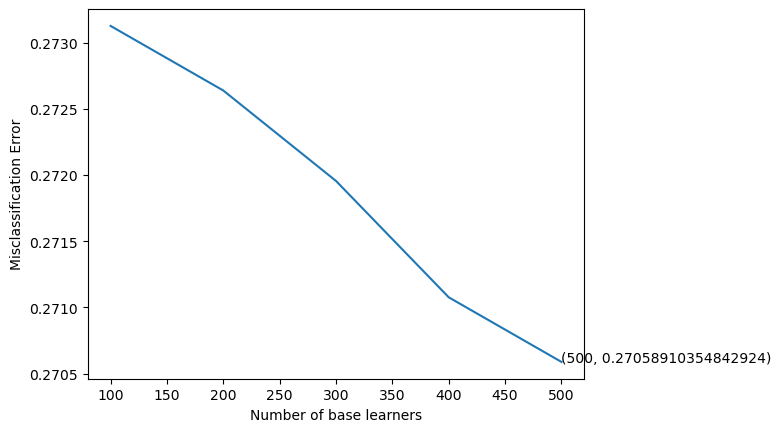

<IPython.core.display.Javascript object>

In [77]:
# Calculate misclassification error
error = [1 - x for x in cv_scores]

# Find the optimal number of base learners
optimal_learners = base_lrn[error.index(min(error))]

# Plot the number of base learners against misclassification error
plt.plot(base_lrn, error)
xy = (optimal_learners, min(error))
plt.annotate("(%s, %s)" % xy, xy=xy, textcoords="data")
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [78]:
# train the best random forest model
model_0 = RandomForestClassifier(
    n_estimators=optimal_learners, random_state=1, n_jobs=-1
)

history_0 = model_0.fit(X_train, y_train)

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

    negative       0.87      0.88      0.88      3200
     neutral       0.48      0.47      0.48       672
    positive       0.67      0.62      0.64       520

    accuracy                           0.79      4392
   macro avg       0.67      0.66      0.67      4392
weighted avg       0.79      0.79      0.79      4392



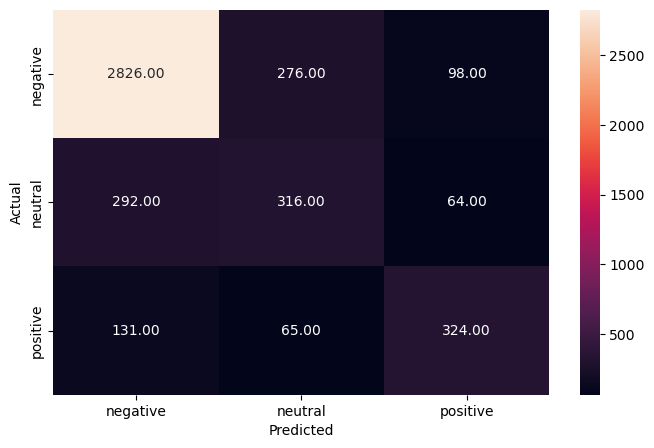

<IPython.core.display.Javascript object>

In [79]:
# Evaluate the model
y_pred_test = model_0.predict(X_test)
metrics_score(y_test, y_pred_test)

#### Results

* __We're predicting 2826 out of 3244 negative tweets accurately. Our largest error there is misclassifying 292 as neutral__
* __We're predicting 316 out of 652 tweets as neutral, with our largest error misclassifying 276 as negative__
* __We're predicting 324 out of 496 tweets as positive, with our largest misclassification as 98 negative__

__Our model is likely biased towards the negative class, based on the unbalanced data__

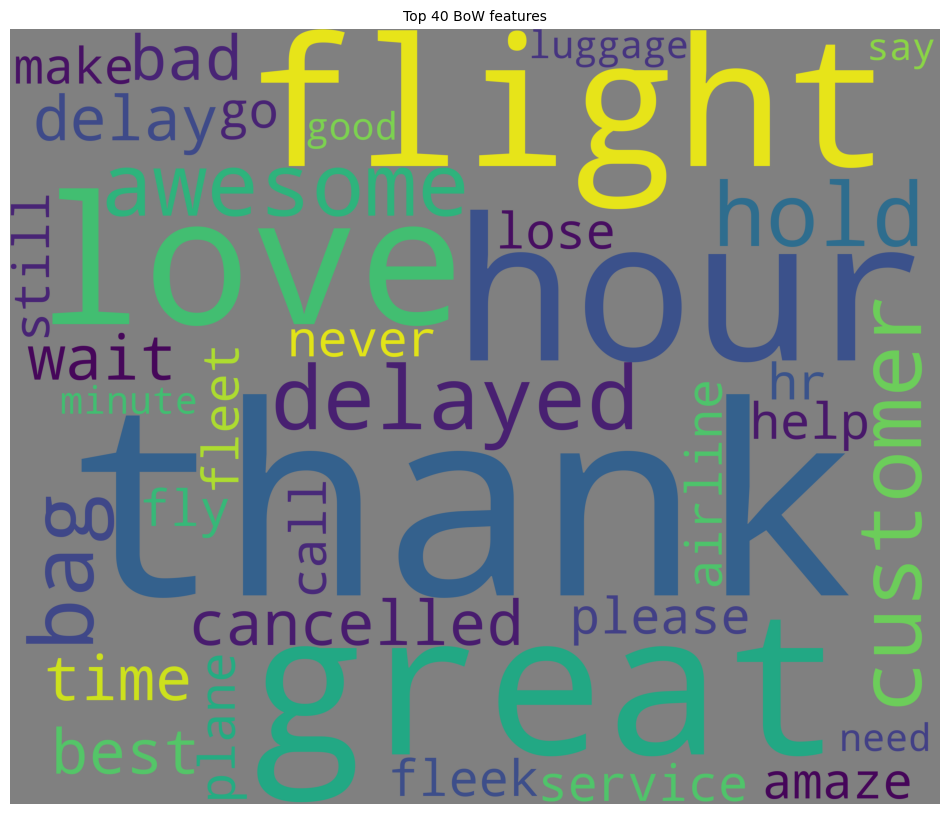

<IPython.core.display.Javascript object>

In [80]:
all_features = Count_vec.get_feature_names_out()
top_features = ""

feat = model_0.feature_importances_

features = np.argsort(feat)[::-1]

for i in features[0:40]:
    top_features += all_features[i]
    top_features += ","

wordcloud = WordCloud(width=3000, height=2500, background_color="grey").generate(
    top_features
)

plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud)
plt.title("Top 40 BoW features", fontsize=10)
plt.axis("off")
plt.show()

### Using TF-IDF (Term Frequency- Inverse Document Frequency)

Term frequency / Inverse Document Frequency takes into account both the frequency that words occur, and also their individual importance across all documents in a corpus. Words with a larger count within a document and words that appear rarely across the corpus are rated more heavily.

In [81]:
# Initialize the Tf-Idf vectorizer
# Set max features to balance accuracy and performance
tfidf_vec = TfidfVectorizer(max_features=5000)

tweet_features_idf = tfidf_vec.fit_transform(tweets["text"])

<IPython.core.display.Javascript object>

In [82]:
# Convert the data features to array
tweet_features_idf = tweet_features_idf.toarray()

<IPython.core.display.Javascript object>

In [83]:
# Shape of the feature vector
tweet_features_idf.shape

(14640, 5000)

<IPython.core.display.Javascript object>

In [84]:
# Set our dependent / independent variables
X = tweet_features_idf
y = tweets.airline_sentiment

<IPython.core.display.Javascript object>

In [85]:
# Split our training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)

<IPython.core.display.Javascript object>

Next, we'll use k-fold cross validation to explore the optimal number of learners for our simple Random Forest classifier. 

In [86]:
%%time
# find the optimal number of base learners using k-fold cross-validation (CV)
base_lrn = np.arange(100,500,100).tolist()

# train model with k-fold CV
cv_scores = []
for lrns in base_lrn:
    clf = RandomForestClassifier(n_estimators = lrns, n_jobs=-1,random_state=1)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

Wall time: 5min 20s


<IPython.core.display.Javascript object>

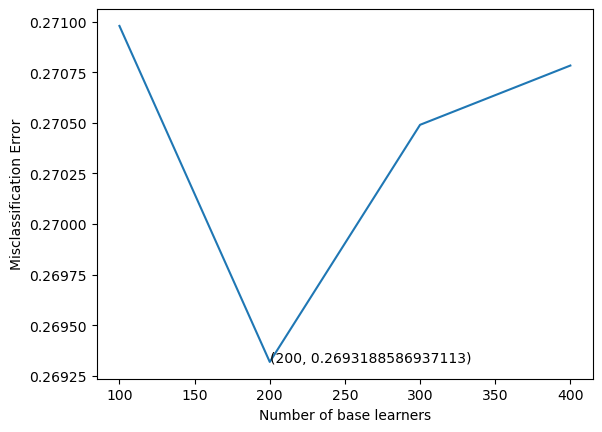

<IPython.core.display.Javascript object>

In [87]:
# Calculate misclassification error
error = [1 - x for x in cv_scores]

# Find the optimal number of base learners
optimal_learners = base_lrn[error.index(min(error))]

# Plot the number of base learners against misclassification error
plt.plot(base_lrn, error)
xy = (optimal_learners, min(error))
plt.annotate("(%s, %s)" % xy, xy=xy, textcoords="data")
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [88]:
# train the best random forest model
model_1 = RandomForestClassifier(
    n_estimators=optimal_learners, random_state=1, n_jobs=-1
)

history_1 = model_1.fit(X_train, y_train)

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

    negative       0.86      0.92      0.89      3200
     neutral       0.55      0.44      0.49       672
    positive       0.73      0.59      0.65       520

    accuracy                           0.81      4392
   macro avg       0.71      0.65      0.67      4392
weighted avg       0.79      0.81      0.80      4392



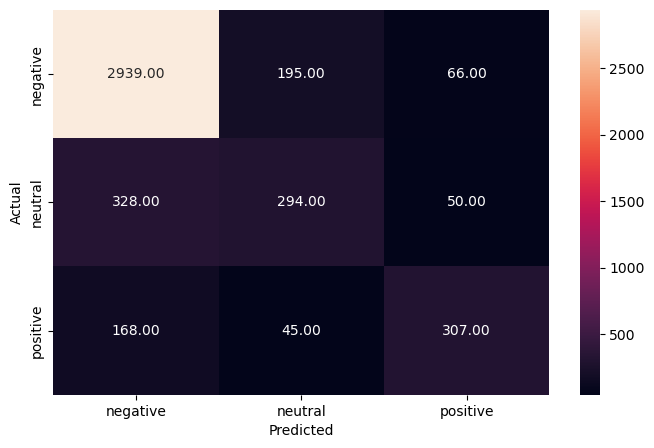

<IPython.core.display.Javascript object>

In [89]:
# Evaluate the model
y_pred_test = model_1.predict(X_test)
metrics_score(y_test, y_pred_test)

#### Results

* __We're predicting 2939 out of 3244 negative tweets accurately. Our largest error there is misclassifying 328 as neutral__
* __We're predicting 294 out of 652 tweets as neutral, with our largest error misclassifying 195 as negative__
* __We're predicting 307 out of 496 tweets as positive, with our largest misclassification as 66 negative__

__This is a significantly more accurate than the simple bag of words model for both the negative and positive classes__
* __We're slightly less accurate than random for neutral tweets__
* __Overall, we see an improvement from 79% to 81% in accuracy, but our best results are 89% for negative tweets__

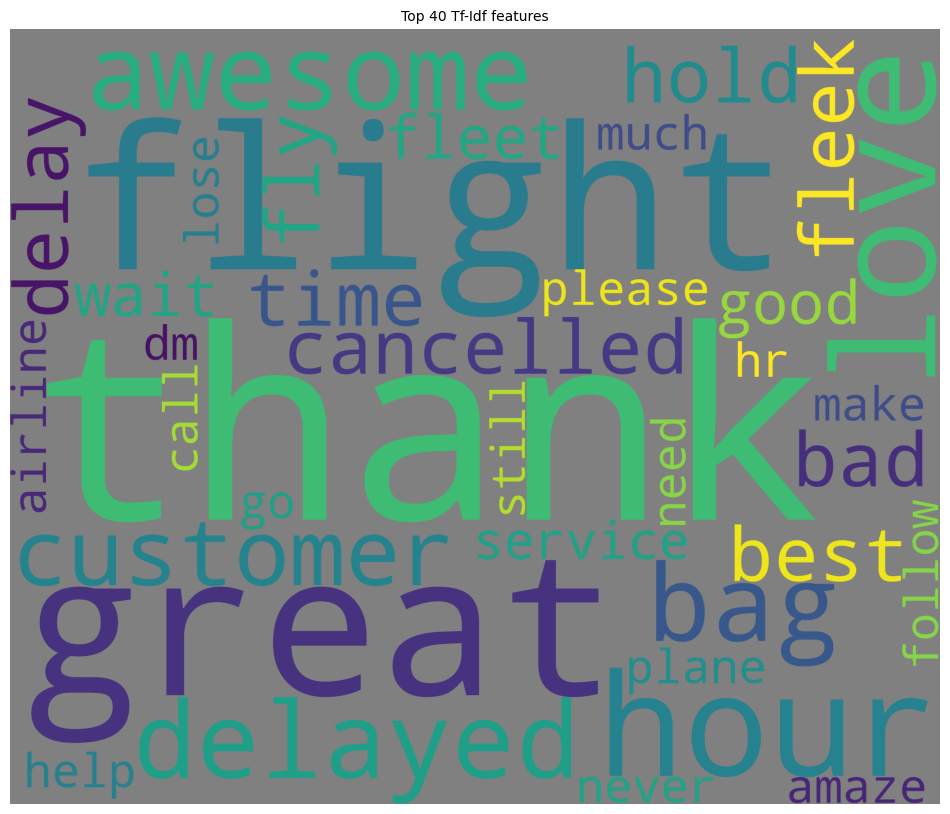

<IPython.core.display.Javascript object>

In [90]:
all_features = Count_vec.get_feature_names_out()
top_features = ""

feat = model_1.feature_importances_

features = np.argsort(feat)[::-1]

for i in features[0:40]:
    top_features += all_features[i]
    top_features += ","

wordcloud = WordCloud(width=3000, height=2500, background_color="grey").generate(
    top_features
)

plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud)
plt.title("Top 40 Tf-Idf features", fontsize=10)
plt.axis("off")
plt.show()

### Training a squential LSTM (Long short-term model) 

In [91]:
# clear the tensorflow backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(3)
random.seed(3)
tf.random.set_seed(3)

<IPython.core.display.Javascript object>

In [92]:
# Initialize the tokenizer
# Set vocabulary to balance accuracy and performance
tokenizer = Tokenizer(num_words=3500, split=" ")

tokenizer.fit_on_texts(tweets["text"].values)

# converting text to sequences
X = tokenizer.texts_to_sequences(tweets["text"].values)

<IPython.core.display.Javascript object>

In [93]:
# Padding the sequences
X = pad_sequences(X)

# creating the target feature
y = pd.get_dummies(tweets["airline_sentiment"])

<IPython.core.display.Javascript object>

In [94]:
print(X.shape)
print(y.shape)

(14640, 19)
(14640, 3)


<IPython.core.display.Javascript object>

In [95]:
# Split our training, test, and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, shuffle=False
)

<IPython.core.display.Javascript object>

In [96]:
# Review the shape of the Train, Validation, and Test datasets
print("Train Set ->", X_train.shape, y_train.shape)
print("Validation Set ->", X_val.shape, y_val.shape)
print("Test Set ->", X_test.shape, y_test.shape)

Train Set -> (7686, 19) (7686, 3)
Validation Set -> (2562, 19) (2562, 3)
Test Set -> (4392, 19) (4392, 3)


<IPython.core.display.Javascript object>

__Create a sequential model__

In [97]:
model_2 = Sequential()

# model will take as input an integer matrix of size (batch, input_length)
model_2.add(Embedding(3500, 32, input_length = X.shape[1]))

model_2.add(SpatialDropout1D(0.5))

model_2.add(Bidirectional(LSTM(64, dropout = 0.5, recurrent_dropout = 0.5)))

model_2.add(Dense(64, activation = 'relu', kernel_regularizer=l2(0.1)))

model_2.add(Dense(3, activation = 'softmax'))

# compile the model
model_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


<IPython.core.display.Javascript object>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 19, 32)            112000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 19, 32)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49664     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 170,115
Trainable params: 170,115
Non-trai

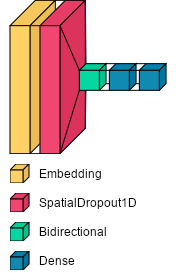

<IPython.core.display.Javascript object>

In [98]:
# Summarize the model
model_2.summary()

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model_2, legend=True, font=font)

In [99]:
%%time
# specifying the batch size 
batch_size = 16

# fitting the model on the training data with 16 epochs
history_2 = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 16, batch_size = batch_size,verbose = 'auto')

Epoch 1/16
481/481 [==============================] - 124s 251ms/step - loss: 1.8192 - accuracy: 0.6102 - val_loss: 0.7304 - val_accuracy: 0.6862
Epoch 2/16
481/481 [==============================] - 119s 247ms/step - loss: 0.7176 - accuracy: 0.6861 - val_loss: 0.6971 - val_accuracy: 0.7221
Epoch 3/16
481/481 [==============================] - 119s 246ms/step - loss: 0.6508 - accuracy: 0.7326 - val_loss: 0.6601 - val_accuracy: 0.7463
Epoch 4/16
481/481 [==============================] - 118s 246ms/step - loss: 0.6205 - accuracy: 0.7557 - val_loss: 0.6719 - val_accuracy: 0.7420
Epoch 5/16
481/481 [==============================] - 118s 246ms/step - loss: 0.5878 - accuracy: 0.7665 - val_loss: 0.6687 - val_accuracy: 0.7447
Epoch 6/16
481/481 [==============================] - 118s 245ms/step - loss: 0.5614 - accuracy: 0.7834 - val_loss: 0.6597 - val_accuracy: 0.7283
Epoch 7/16
481/481 [==============================] - 119s 248ms/step - loss: 0.5460 - accuracy: 0.7910 - val_loss: 0.7146 -

<IPython.core.display.Javascript object>

In [100]:
print(
    "Training:",
    model_2.evaluate(X_train, y_train),
)  # Evaluate on train set
print("Testing:", model_2.evaluate(X_test, y_test))  # Evaluate on test set

241/241 [==============================] - 6s 24ms/step - loss: 0.3098 - accuracy: 0.9057
Training: [0.30983588099479675, 0.9056726098060608]
138/138 [==============================] - 3s 25ms/step - loss: 0.5961 - accuracy: 0.8056
Testing: [0.5961058735847473, 0.805555522441864]


<IPython.core.display.Javascript object>

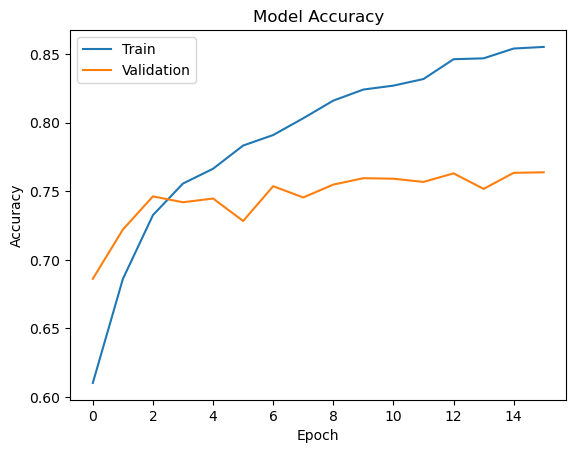

<IPython.core.display.Javascript object>

In [101]:
plt.plot(history_2.history["accuracy"])
plt.plot(history_2.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

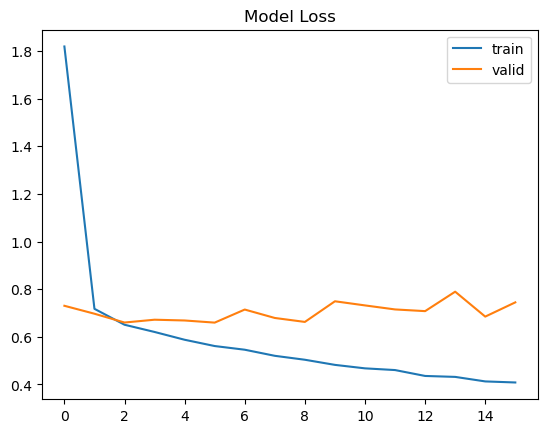

<IPython.core.display.Javascript object>

In [102]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_2.history)
hist["epoch"] = history_2.epoch

# Plotting accuracy at different epochs
plt.title("Model Loss")
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)
plt.show()

In [103]:
# Evaluate the model
evaluation_result = model_2.evaluate(X_test, y_test)
y_pred_test = model_2.predict(X_test)

print("Test Accuracy:", evaluation_result[1])

138/138 [==============================] - 4s 24ms/step
Test Accuracy: 0.805555522441864


<IPython.core.display.Javascript object>

In [104]:
# Convert one-hot encoded labels back to class labels
y_test_labels = y_test.idxmax(axis=1)

# Convert y_pred_test to class labels
y_pred_labels = np.argmax(y_pred_test, axis=1)

# Convert y_test_labels to numeric labels (class indices)
label_mapping = {
    "negative": 0,
    "neutral": 1,
    "positive": 2,
}

y_test_labels_numeric = y_test_labels.map(label_mapping)
class_names = ["negative", "neutral", "positive"]

# Generate a classification report
report = classification_report(
    y_test_labels_numeric, y_pred_labels, target_names=class_names
)

print(report)

              precision    recall  f1-score   support

    negative       0.88      0.89      0.88      3200
     neutral       0.53      0.50      0.51       672
    positive       0.69      0.68      0.68       520

    accuracy                           0.81      4392
   macro avg       0.70      0.69      0.69      4392
weighted avg       0.80      0.81      0.80      4392



<IPython.core.display.Javascript object>

# Results

* __With a training accuracy of 91% overall and a test accuracy of 80%, we're still overfitting to the training data__
* __As previously noted, our classes are unbalanced, and for production I could always employ some technique to balance the data out before training.  I'll consider that out of scope for this assignment; I wanted to experiment with the LSTM network.__


* __If we look at the spread between our overall performance with training data and our prediction performance for the negative class, those are pretty close together and performant__
* __We're still only slightly more than breaking even at 51% to detect neutral tweets - in my final recommendations, I'll suggest that the business process for handling neutral/positive tweets should be combined, and there should be a separate process for negative tweets.__


* __I experimented with Bidirectional LSTM, and I have to say that I expected better results.  I will continue to experiment, but I thought this model was pretty robust.__
* __This model is comparable - slightly worse - than Tf-Idf in the results, and I expected it to be better.__


## Summary

---



__Business Processes__

* __Looking at the entire corpus of tweets, the overwhelming majority express negative sentiments. This is an opportunity to rapidly and automatically identify those for action, and connect them with a responsive business process to intervene and engage with dissatisfied customers to change their perception.__
* __Grouping neutral and positive tweets together, on the other hand, suggests a completely different and less urgent process to validate what is working well - or at least not actively aggravating our customers.__
* __Using the relatively simple Tf-Idf analysis model gives us an almost 90% confidence we can identify negative tweets.__

__Processing Tweets__

* __As previously noted, cleaning up this text takes some domain-specific content into account. The approach here is sufficiently modular that additional terms can be easily added to the stopwords, or expressions for common abbreviations can be filtered easily.__
* __Twitter uses a common mechanism for named entities (@ mentions) that can either be extracted or filtered.__

__Balancing the data__

* __As this data is labeled, it might be interesting to accumulate additional positive and neutral tweets to balance the classes in the dataset we're analyzing.__

__Identifying Incidents__

* __While analyzing and predicting individual tweets can offer an opportunity to improve the experience of individual customers, recognizing "spikes" in activity, or related tweets can offer some insight into system-wide problems.__
* __These are incidents that have the potential for disruption across larger populations, and can provide time-sensitive critical insights to mitigate serious impacts.__
* __Retrospective analysis of these incidents can also provide specific guidance to recognize and avoid these impacts in the future.__
* __I recommend we incorporate time-based incident analysis as a new business process.__

## Happy Learning!